<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Semana_02_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Merge Sort](https://www.youtube.com/watch?v=dENca26N6V4)**

É um algoritmo de ordenação que utiliza a estratégia "dividir para conquistar". Ele divide recursivamente uma lista em sublistas menores até que cada sublista contenha um único elemento ou esteja vazia (caso base) – as quais são consideradas ordenadas por definição.


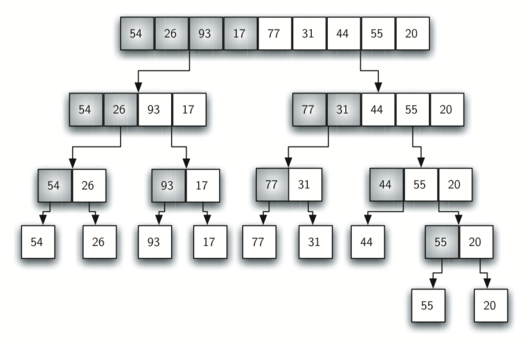

Em seguida, essas sublistas são intercaladas (merge) de forma ordenada até que se obtenha a lista final ordenada.

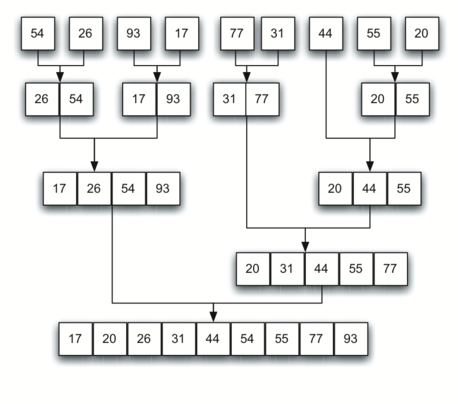

##**Implementação**

###**Função merge**

Combina duas listas (`esquerda` e `direita`) ordenadas em uma outra também ordenada.

In [ ]:
def merge(esquerda, direita):

  resultado, indice_esquerda, indice_direita = [], 0, 0

  # Comparar elementos das duas metades e mesclar ordenadamente
  while indice_esquerda < len(esquerda) and indice_direita < len(direita):
    if esquerda[indice_esquerda] < direita[indice_direita]:
      resultado.append(esquerda[indice_esquerda])
      indice_esquerda += 1
    else:
      resultado.append(direita[indice_direita])
      indice_direita += 1

  # Adicionar os elementos restantes (se houver)
  resultado.extend(esquerda[indice_esquerda:])
  resultado.extend(direita[indice_direita:])

  return resultado

**Explicação:**

1.  **Inicialização:**
    * `resultado` é uma lista vazia que armazenará o resultado da mesclagem.
    * `indice_esquerda` e `indice_direita` são inicializados com 0, representando os índices iniciais das listas `esquerda` e `direita`, respectivamente.

2.  **Mesclagem ordenada:**
    * O loop `while` continua enquanto houver elementos em ambas as listas.
    * Dentro do loop, os elementos nas posições `indice_esquerda` e `indice_direita` são comparados.
    * O menor elemento é adicionado à lista `resultado`, e o índice correspondente é incrementado.

3.  **Adição dos elementos restantes:**
    * Após o loop `while`, pode haver elementos restantes em uma das listas.
    * `resultado.extend(esquerda[indice_esquerda:])` adiciona os elementos restantes da lista `esquerda` à lista `resultado`.
    * `resultado.extend(direita[indice_direita:])` adiciona os elementos restantes da lista `direita` à lista `resultado`.

4.  **Retorno do resultado:**
    * A função retorna a lista `resultado`, que contém todos os elementos de `esquerda` e `direita`, ordenados.


###**Função merge_sort**

Opera ao dividir uma estrutura em conjuntos menores e, em seguida, aplicar a ordenação aos elementos que foram retirados da estrutura original. Depois de ordenar esses conjuntos menores, eles são mesclados (merge) para formar um conjunto final ordenado. Em essência, o algoritmo segue o princípio "Dividir para conquistar", que é amplamente reconhecido e utilizado.

#### **Merge Sort Recursivo**

- Mais simples de implementar e entender

- Usa a pilha de chamadas (pode ter problemas com arrays muito grandes)

- Abordagem top-down

In [ ]:
def merge_sort_recursivo(arr):
  # Obtém o tamanho da lista
  n = len(arr)

  # Caso base: se a lista tiver 1 ou 0 elementos, ela já está ordenada
  if n <= 1:
    return arr

  # Dividir a lista ao meio
  meio = n // 2
  metade_esquerda = arr[:meio]  # Metade esquerda da lista
  metade_direita = arr[meio:] # Metade direita da lista

  # Ordenar recursivamente as duas metades
  metade_esquerda = merge_sort_recursivo(metade_esquerda)
  metade_direita = merge_sort_recursivo(metade_direita)

  # Combinar as duas metades ordenadas
  return merge(metade_esquerda, metade_direita)  # Retorna a lista ordenada

**Explicação:**

1.  **Caso base:** Se a lista `arr` tiver 0 ou 1 elemento, ela já está ordenada, então a função retorna a própria lista.

2.  **Divisão:** Caso contrário, a lista é dividida ao meio, criando duas sublistas: `metade_esquerda` e `metade_direita`.

3.  **Recursão:** A função `ordenacao_merge_recursiva` é chamada recursivamente para ordenar as duas sublistas.

4.  **Intercalação:** A função `merge(metade_esquerda, metade_direita)` é chamada para combinar as duas sublistas ordenadas em uma única lista ordenada.

5.  **Retorno:** A função retorna a lista ordenada resultante.

#### **Merge Sort Iterativo**

- Mais complexo de implementar

- Não usa recursão (evita estouro de pilha)

- Abordagem bottom-up

- Geralmente um pouco mais rápido na prática por evitar overhead de chamadas recursivas

In [ ]:
def merge_sort_iterativo(arr):
  # Inicializa o tamanho da sublista como 1
  tamanho_sublista = 1

  # Continua o loop enquanto o tamanho da sublista for menor que o tamanho da lista original
  while tamanho_sublista < len(arr):
    # Percorre a lista em passos de tamanho 2 * tamanho_sublista
    for inicio in range(0, len(arr), 2 * tamanho_sublista):
      # Calcula o ponto médio da sublista
      meio = inicio + tamanho_sublista

      # Calcula o ponto final da sublista (limitado pelo tamanho da lista original)
      fim = min(inicio + 2 * tamanho_sublista, len(arr))

      # Divide a sublista atual em duas partes: [inicio:meio] e [meio:fim]
      esquerda = arr[inicio:meio]
      direita = arr[meio:fim]

      # Chama a função intercalar para mesclar as sublistas ordenadas (esquerda e direita)
      # e armazenar o resultado de volta na lista original (arr)
      arr[inicio:fim] = merge(esquerda, direita)

    # Dobra o tamanho da sublista para a próxima iteração
    tamanho_sublista *= 2

  # Retorna a lista original ordenada
  return arr

**Explicação:**

1.  **Inicialização:**
    * `tamanho_sublista` começa com 1, representando o tamanho inicial das sublistas a serem mescladas.

2.  **Loop principal:**
    * O loop `while` continua enquanto o `tamanho_sublista` for menor que o tamanho da lista `arr`. Isso garante que todas as partes da lista sejam eventualmente mescladas.

3.  **Loop interno:**
    * O loop `for` percorre a lista `arr` em passos de `2 * tamanho_sublista`. Isso permite processar pares de sublistas adjacentes.

4.  **Cálculo dos índices:**
    * `meio` calcula o ponto médio da sublista atual.
    * `fim` calcula o ponto final da sublista, garantindo que não ultrapasse o tamanho da lista `arr`.

5.  **Divisão das sublistas:**
    * `esquerda` e `direita` são criadas, representando as duas sublistas a serem mescladas.

6.  **Intercalação:**
    * A função `merge(esquerda, direita)` é chamada para mesclar as sublistas `esquerda` e `direita`. O resultado é armazenado de volta na lista `arr`, na posição correta.

7.  **Incremento do tamanho da sublista:**
    * `tamanho_sublista *= 2` dobra o tamanho da sublista para a próxima iteração, garantindo que sublistas maiores sejam mescladas gradualmente.

8.  **Retorno:**
    * Após a conclusão de todos os loops, a lista `arr` estará completamente ordenada, e a função a retorna.

### **Exemplo de Uso**

In [ ]:
numeros = [64, 34, 25, 12, 22, 11, 90]
print("Lista original:", numeros)
lista_ordenada = merge_sort_recursivo(numeros)
print("Lista ordenada:", lista_ordenada)

Lista original: [64, 34, 25, 12, 22, 11, 90]
Lista ordenada: [11, 12, 22, 25, 34, 64, 90]


## **Análise de Complexidade**

### **Tempo de Execução**


A análise do tempo de execução do algoritmo envolve dois processos distintos:

O algoritmo realiza duas etapas principais:

1. **Divisão:** Ocorre em $O(\log n)$ passos, pois dividimos a lista ao meio até que cada sublista tenha um único elemento.
2. **Intercalação:** Em cada um dos $\log n$ níveis de intercalação, processamos $n$ elementos, resultando em $O(n \log n)$.

A complexidade total do algoritmo é determinada pela soma das etapas:

<center> $O(\log n) + O(n \log n) = O(n \log n)$ </center>

Como $O(n \log n)$ domina $O(\log n)$, a complexidade final do algoritmo é:

<center> $O(n \log n)$ </center>

Para demonstrar isso empiricamente, vamos medir o tempo de execução do Merge Sort para diferentes tamanhos de entrada.

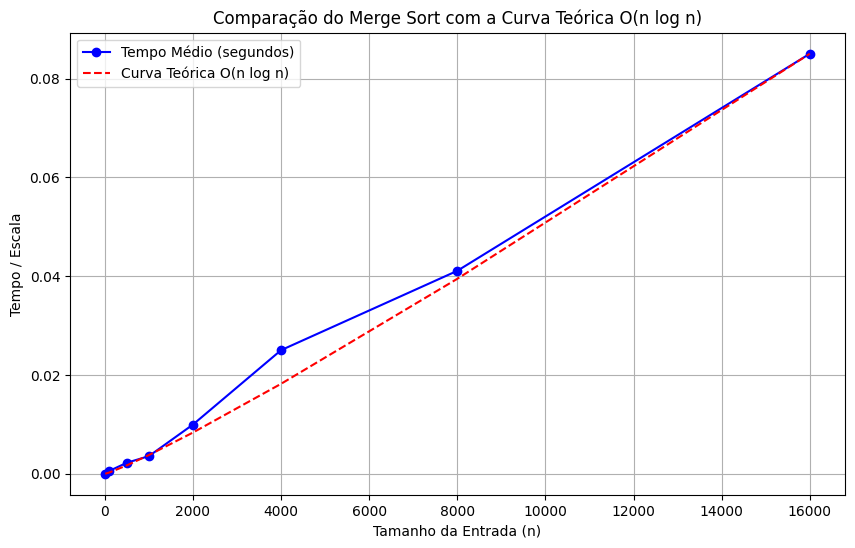

In [ ]:
import time
import random
import math
import matplotlib.pyplot as plt

def medir_tempo(tamanho, trials=30):
    """ Mede o tempo médio de ordenação para listas de tamanho especificado """
    total_tempo = 0.0
    for _ in range(trials):
        lista = [random.randint(0, 1000) for _ in range(tamanho)]
        inicio = time.perf_counter()
        merge_sort_recursivo(lista)
        total_tempo += time.perf_counter() - inicio
    return total_tempo / trials

# Definição dos tamanhos de entrada
tamanhos = [10, 100, 500, 1000, 2000, 4000, 8000, 16000]
tempos = [medir_tempo(t) for t in tamanhos]

# Cálculo da curva teórica O(n log n)
n_log_n = [n * math.log2(n) for n in tamanhos]

# Normalização da curva teórica para comparação
fator_escala = tempos[-1] / n_log_n[-1]
n_log_n_escalado = [x * fator_escala for x in n_log_n]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos, marker='o', linestyle='-', color='b', label='Tempo Médio (segundos)')
plt.plot(tamanhos, n_log_n_escalado, linestyle='--', color='r', label='Curva Teórica O(n log n)')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo / Escala')
plt.title('Comparação do Merge Sort com a Curva Teórica O(n log n)')
plt.legend()
plt.grid(True)
plt.show()

Isso torna o algoritmo significativamente mais eficiente do que métodos quadráticos como o **Bubble Sort**, **Selection Sort** e o **Insertion Sort** $O(n^2)$, sendo amplamente utilizado para ordenação eficiente de grandes volumes de dados.

#### **Detalhamento das Etapas**

Para compreender melhor o motivo da complexidade $O(n \log n)$, analisamos as duas etapas fundamentais do algoritmo:

##### **1. Divisão**

O primeiro passo é dividir a lista repetidamente em metades. Se começarmos com $n$ itens, após a primeira divisão restarão aproximadamente $n/2$ itens. Após a segunda, $n/4$, depois $n/8$, $n/16$ e assim por diante. A tabela abaixo ilustra esse processo:

<center>

| Divisão (i) | Itens restantes |
|-------------|-----------------|
| 1           | $\frac{n}{2}$   |
| 2           | $\frac{n}{4}$   |
| 3           | $\frac{n}{8}$   |
| 4           | $\frac{n}{16}$  |
| ...         | ...             |
| i           | $\frac{n}{2^i}$ |

</center>

Dado que a cada etapa dividimos $n$ por $2$, queremos encontrar o número de divisões $i$ tal que reste apenas um único item:

<center> $\frac{n}{2^i} = 1$ </center>

Isolando $i$, multiplicamos ambos os lados por $2^i$:

<center> $n = 2^i$ </center>

Agora, aplicamos o logaritmo de base $2$ em ambos os lados:

<center> $\log_2 n = \log_2 (2^i)$ </center>

Usando a propriedade do logaritmo $\log_b (a^c) = c \log_b a$, temos:

<center> $log_2 n = i \cdot \log_2 2$ </center>

Como $\log_2 2 = 1$, obtemos:

<center> $\log_2 n = i$ </center>

Portanto, o número necessário de divisões para atingir um único item é:

<center> $i = \log_2 n$ </center>

##### **2. Intercalação**

Após dividir a lista até que cada sublista tenha apenas um elemento, precisamos intercalar essas sublistas ordenadas para reconstruir a lista original. Esse processo ocorre em múltiplos níveis, desde as menores sublistas até a lista completa.

| Intercalação | Sublistas | Tamanho da Sublista | Itens Processados |
|----------------------|--------------------|------------------|-----------------|
| 1 | $n$ | 1 | n |
| 2 | $n/2$ | 2 | n |
| 3 | $n/4$ | 4 | n |
| ⋮ | ⋮ | ⋮ | ⋮ |
| $\log_2 n$ | 1 | n | n |

A cada nível da intercalação, o número de sublistas é reduzido pela metade, enquanto o tamanho de cada sublista dobra. Esse processo ocorre por $\log n$ níveis, e cada nível processa $n$ elementos. Assim, o tempo total da intercalação é $O(n\log n)$.

### **Uso de Memória**

O Merge Sort não ordena a lista original in-place, o que significa que ele precisa de espaço adicional para realizar a ordenação.



#### **Espaço Auxiliar**

O Merge Sort é um algoritmo que não opera "in-place", ou seja, ele requer espaço de memória adicional para armazenar temporariamente os elementos durante o processo de intercalação (merge). Vamos analisar quanto espaço auxiliar é necessário.

**1. Número de Sublistas**

No nível $i$, o número de sublistas diminui exponencialmente: $2^{\log_2 n-(-i-1)}$.
- No primeiro nível ($i=1$), há $2^{\log_2 n}$ sublistas de tamanho $1$.
- No segundo nível ($i=2$), o número de sublistas reduz para $2^{\log_2 n-1}$, e assim por diante.

**2. Tamanho de Cada Sublista**

Cada sublista dobra de tamanho a cada novo nível $i$, conforme: $2^{i-1}$.

- No primeiro nível, o tamanho de cada sublista é $1$.
- No segundo nível, o tamanho é $2$.
- No terceiro nível, o tamanho é $4$, e assim por diante.

**3. Cálculo do Espaço Auxiliar**

O espaço auxiliar necessário no nível $i$ é o produto do número de sublistas pelo tamanho de cada sublista:

<center> $2^{\log_2 n-(-i-1)} × 2^{i-1}$ </center>

Usando a propriedade de potências $2^a × 2^b = 2^{a+b}$ , temos:

<center> $2^{(\log_2 n-(-i-1))+(i+1)}$ </center>

Como os termos $-(i-1)$ e $+(i-1)$ se cancelam, resta:

<center> $2^{\log_2 n} = n$ </center>

Isso mostra que o espaço auxiliar necessário em cada nível permanece constante e é sempre igual a $n$, independentemente de $i$.

**Tabela de Intercalação**

A seguir, apresentamos uma tabela que resume a evolução do processo de intercalação. Ela mostra como o número de sublistas e o tamanho de cada uma variam a cada nível, enquanto o espaço auxiliar necessário permanece constante.

| Intercalação ($i$) | Sublistas | Tamanho da Sublista | Espaço Auxiliar |
|----------------------|--------------------|------------------|-----------------|
| 1 | $2^{\log n}$ | $2^0$ | n |
| 2 | $2^{\log n - 1}$ | $2^1$ | n |
| 3 | $2^{\log n - 2}$ | $2^2$ | n |
| ⋮ | ⋮ | ⋮ | ⋮ |
| $\log_2 n$ | 1 | n | n |

Portanto, em cada um dos $\log n$ níveis de intercalação, o Merge Sort requer $n$ unidades de espaço auxiliar, o que resulta em uma complexidade de espaço total de $O(\log n) × O(n)$. Como $O(n)$ domina $O(\log n)$, a complexidade final do algoritmo é $O(n)$.

#### **Gráfico de Uso de Memória**

Para demonstrar isso empiricamente, vamos medir o uso de memória do Merge Sort para diferentes tamanhos de entrada.

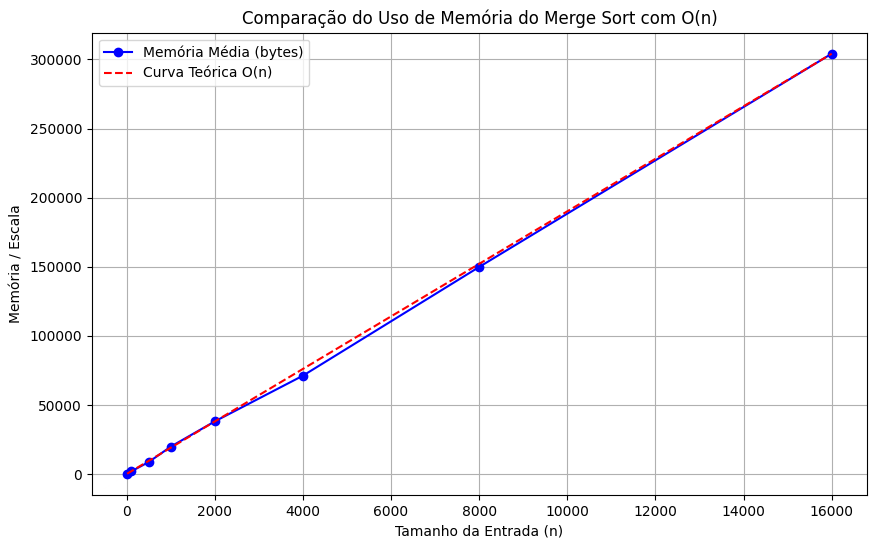

In [ ]:
import sys
import tracemalloc

def medir_memoria(tamanho, trials=30):
    """ Mede o uso médio de memória para ordenar listas de tamanho especificado """
    total_memoria = 0
    for _ in range(trials):
        lista = [random.randint(0, 1000) for _ in range(tamanho)]
        tracemalloc.start()
        merge_sort_recursivo(lista)
        _, pico = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        total_memoria += pico
    return total_memoria / trials

# Definição dos tamanhos de entrada
tamanhos = [10, 100, 500, 1000, 2000, 4000, 8000, 16000]
memorias = [medir_memoria(t) for t in tamanhos]

# Cálculo da curva teórica O(n)
n_teorico = [n for n in tamanhos]

# Normalização da curva teórica para comparação
fator_escala = memorias[-1] / n_teorico[-1]
n_teorico_escalado = [x * fator_escala for x in n_teorico]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, memorias, marker='o', linestyle='-', color='b', label='Memória Média (bytes)')
plt.plot(tamanhos, n_teorico_escalado, linestyle='--', color='r', label='Curva Teórica O(n)')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Memória / Escala')
plt.title('Comparação do Uso de Memória do Merge Sort com O(n)')
plt.legend()
plt.grid(True)
plt.show()

## **Exercícios**

### **Exercícios sobre a função merge**

1. **Rastreamento Manual:** Dadas as listas `esquerda = [1, 4, 7]` e `direita = [2, 5, 9]`, execute manualmente a função `merge(esquerda, direita)`. Mostre o estado da lista resultado e os valores de indice_esquerda e indice_direita a cada passo do loop while. Qual é o resultado final?

2. **Rastreamento com Restantes:** Execute manualmente a função merge para `esquerda = [10, 20]` e `direita = [5, 15, 25, 30]`. Preste atenção especial a como os elementos restantes são adicionados após o término do loop while.

3. **Modificação (Ordem Decrescente):** Modifique a função merge para que ela combine as duas listas ordenadas em uma única lista ordenada em ordem decrescente.

### **Exercícios sobre merge_sort_recursivo**

1. **Rastreamento Recursivo:** Desenhe a árvore de chamadas recursivas para merge_sort_recursivo com a entrada `arr = [3, 1, 4, 1, 5, 9, 2, 6]`. Para cada chamada, mostre as listas metade_esquerda e metade_direita e o resultado da chamada merge.

2. **Caso Base:** Explique a importância da condição `if n <= 1:` na função merge_sort_recursivo. O que aconteceria se essa condição fosse removida?

3. **Relação com Dividir para Conquistar:** Explique como a função merge_sort_recursivo exemplifica o paradigma "Dividir para Conquistar". Quais são as etapas de divisão, conquista e combinação neste algoritmo?

### **Exercícios sobre merge_sort_iterativo**

1. **Rastreamento Iterativo:** Para a lista `arr = [6, 5, 3, 1, 8, 7, 2, 4]`, mostre o estado da lista arr após cada iteração completa do loop while externo na função merge_sort_iterativo (ou seja, após a mesclagem de todas as sublistas para um determinado tamanho_sublista).

2. **Lógica do Loop:** Explique por que a variável tamanho_sublista começa em 1 e dobra a cada iteração do loop while. Como isso garante que toda a lista seja eventualmente ordenada?

3. **Comparação:** Compare a abordagem iterativa com a recursiva. Quais são as vantagens e desvantagens de cada uma mencionadas no texto (ou que você pode inferir)?

### **Exercícios sobre Análise de Complexidade**

1. **Comparação com $O(n^2)$:** Por que um algoritmo $O(n log n)$ como o Merge Sort é considerado mais eficiente para grandes conjuntos de dados do que algoritmos $O(n^2)$ como Bubble Sort ou Selection Sort?

2. **Melhor/Pior Caso:** A ordem inicial dos elementos na lista de entrada afeta significativamente o tempo de execução do Merge Sort? Justifique sua resposta com base no funcionamento do algoritmo.

### **Exercícios de Aplicação e Modificação**

1. **Ordenando Objetos:** Suponha que você tenha uma lista de objetos Aluno, onde cada aluno tem um nome e uma nota. Como você adaptaria o Merge Sort para ordenar a lista de alunos com base em suas notas (em ordem crescente)? (Dica: pense em como a comparação `esquerda[indice_esquerda] < direita[indice_direita]` seria modificada).

2. **Ordenando Strings:** Como você usaria as funções merge e merge_sort (recursiva ou iterativa) fornecidas para ordenar uma lista de strings em ordem alfabética? Seria necessária alguma modificação?